# Mounting Drive 

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:

!ls "/content/drive/MyDrive/Emotion Speech Recognition"
!cd "/content/drive/MyDrive/Emotion Speech Recognition"
!ls

Dataset		     demo_audio.wav	 Predictions.xlsx
dataset_attr.csv     features_dataframe  speech_emotion_recognition.ipynb
dataset_attr.gsheet  img_data		 Trained_Models
demo_audio2.wav      model.json		 utils
demo_audio4.wav      Others
demo_audio5.wav      Predictions.csv
drive  sample_data


#  Installation of Dependencies



Essential requirement of of our project :
1. **Python 3.7**
2. **Librosa**
3. **PyTorch**
4. **Keras**
5. **GPU**

We have Already installed this frameworks and packages.

In [ ]:
# Provides a way of using operating system dependent functionality. 
import os

# LibROSA provides the audio analysis
import librosa
# Need to implictly import from librosa
import librosa.display

# Import the audio playback widget
import IPython.display as ipd
from IPython.display import Image

# Enable plot in the notebook
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt

# These are generally useful to have around
import numpy as np
import pandas as pd


# To build Neural Network and Create desired Model
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D #, AveragePooling1D
from keras.layers import Flatten, Dropout, Activation # Input, 
from keras.layers import Dense #, Embedding
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

Populating the interactive namespace from numpy and matplotlib


# 3. Data Preparation


### Plotting the audio file's waveform and its spectrogram

In [ ]:
data, sampling_rate = librosa.load('/content/drive/MyDrive/ravdess data/Actor_01/03-01-01-01-01-01-01.wav')
# To play audio this in the jupyter notebook
ipd.Audio('/content/drive/MyDrive/ravdess data/Actor_01/03-01-01-01-01-01-01.wav')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
len(data)

72839

In [ ]:
sampling_rate

22050

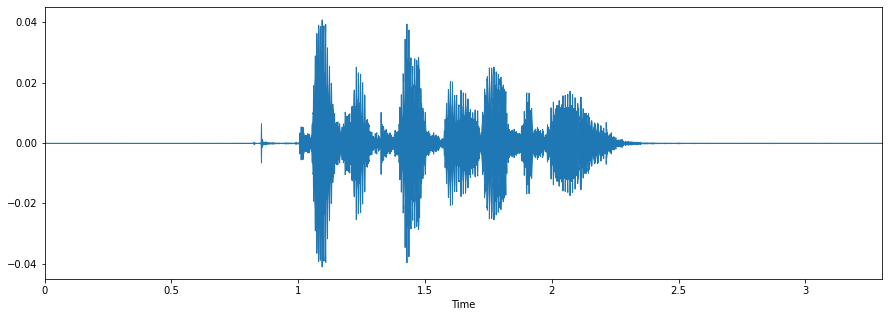

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

### Converting Dataset in CSV format

it will cause easy operation on Dataset.

In [ ]:
dataset_path = os.path.abspath('./Dataset')
destination_path = os.path.abspath('./')
# To shuffle the dataset instances/records
randomize = True
# for spliting dataset into training and testing dataset
split = 0.8
# Number of sample per second e.g. 16KHz
sampling_rate = 20000 
emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]\

In [ ]:
!ls

drive  sample_data


In [ ]:
# import required libraries
import os
import sys
import csv
import librosa
import numpy as np
import pandas as pd
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
np.random.seed(42)

def create_meta_csv(dataset_path, destination_path):
   
    # Change dataset path accordingly
    DATASET_PATH = os.path.abspath(dataset_path)
    csv_path=os.path.join(destination_path, '/content/drive/MyDrive/Emotion Speech Recognition/model.json')
    flist = []
    emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]
    for root, dirs, files in os.walk(DATASET_PATH, topdown=False):
        for name in files:
            if (name.endswith('.wav')): 
                fullName = os.path.join(root, name)
                flist.append(fullName)

    split_format = str('/') if sys.platform=='linux' else str('\\')
    
    filenames=[]
    for idx,file in enumerate(flist):
        filenames.append(file.split(split_format)) 
        # print(filenames[idx])
    types=[]
    for idx,path in enumerate(filenames):
        types.append((flist[idx],emotions.index(path[-2]))) ##second last location has emotion name

    with open(csv_path, 'w') as f:
        writer = csv.writer(f)
        writer.writerows([("path","label")])
        writer.writerows(types)
    f.close()
    # change destination_path to DATASET_PATH if destination_path is None 
    if destination_path == None:
        destination_path = DATASET_PATH
        # write out as dataset_attr.csv in destination_path directory
        # if no error
    return True

def create_and_load_meta_csv_df(dataset_path, destination_path, randomize=True, split=None):
   
    if create_meta_csv(dataset_path, destination_path=destination_path):
        dframe = pd.read_csv(os.path.join(destination_path, '/content/drive/MyDrive/Emotion Speech Recognition/dataset_attr.csv'))

    # shuffle if randomize is True or if split specified and randomize is not specified 
    # so default behavior is split
    if randomize == True or (split != None and randomize == None):
        # shuffle the dataframe here
        dframe=dframe.sample(frac=1).reset_index(drop=True)
        pass

    if split != None:
        train_set, test_set = train_test_split(dframe, split)
        return dframe, train_set, test_set 
    
    return dframe

In [ ]:
def train_test_split(dframe, split_ratio):
   
    # divide into train and test dataframes
    train_data= dframe.iloc[:int((split_ratio) * len(dframe)), :]
    test_data= dframe.iloc[int((split_ratio) * len(dframe)):,:]
    test_data=test_data.reset_index(drop=True) #reset index for test data
    return train_data, test_data

In [ ]:
# loading dataframes using dataset module 
# To know more about "create_and_load_meta_csv_df" function and it's working, go to "./utils/dataset.py" script. 
df, train_df, test_df = create_and_load_meta_csv_df(dataset_path, destination_path, randomize, split)

In [ ]:
print('Dataset samples  : ', len(df),"\nTraining Samples : ", len(train_df),"\ntesting Samples  : ", len(test_df))

Dataset samples  :  2556 
Training Samples :  2044 
testing Samples  :  512


# 4. Data Visualization

Let's understand what is our dataset.

In [ ]:
df.head()

,path,label
0,/content/drive/.shortcut-targets-by-id/104/Emo...,2
1,/content/drive/.shortcut-targets-by-id/104/Emo...,5
2,/content/drive/.shortcut-targets-by-id/104/Emo...,5
3,/content/drive/.shortcut-targets-by-id/104/Emo...,6
4,/content/drive/.shortcut-targets-by-id/104/Emo...,2


In [ ]:
print("Actual Audio : ", df['path'][0])
print("Labels       : ", df['label'][0])


Actual Audio :  /content/drive/.shortcut-targets-by-id/104/Emotion Speech Recognition/Dataset/fear/fear049.wav
Labels       :  2



### Labels Assigned for emotions : 
- 0 : anger
- 1 : disgust
- 2 : fear
- 3 : happy
- 4 : neutral 
- 5 : sad
- 6 : surprise


In [ ]:
unique_labels = train_df.label.unique()
unique_labels.sort()
print("unique labels in Emtion dataset : ")
print(*unique_labels, sep=', ')
unique_labels_counts = train_df.label.value_counts(sort=False)
print("\n\nCount of unique labels in Emtion dataset : ")
print(*unique_labels_counts,sep=', ')

unique labels in Emtion dataset : 
0, 1, 2, 3, 4, 5, 6


Count of unique labels in Emtion dataset : 
351, 353, 211, 339, 337, 198, 255


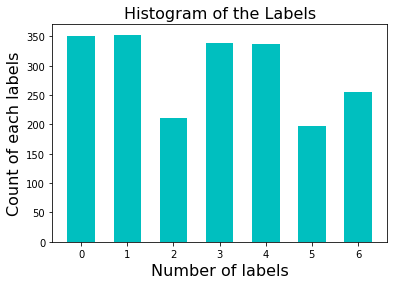

In [ ]:
# Histogram of the classes
plt.bar(unique_labels,unique_labels_counts,align = 'center', width=0.6, color = 'c')
plt.xlabel('Number of labels', fontsize=16)
plt.xticks(unique_labels)
plt.ylabel('Count of each labels', fontsize=16)
plt.title('Histogram of the Labels', fontsize=16)
plt.show()

# 5. Data Pre-Processing

### Getting the features of audio files using librosa

Calculating MFCC, Pitch, magnitude, Chroma features.

In [ ]:
 # feature_extracting
import librosa
import pandas as pd
import numpy as np

def get_audio_features(audio_path,sampling_rate):
    X, sample_rate = librosa.load(audio_path ,res_type='kaiser_fast',duration=2.5,sr=sampling_rate*2,offset=0.5)
    sample_rate = np.array(sample_rate)

    y_harmonic, y_percussive = librosa.effects.hpss(X)
    pitches, magnitudes = librosa.core.pitch.piptrack(y=X, sr=sample_rate)

    mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=1)

    pitches = np.trim_zeros(np.mean(pitches,axis=1))[:20]

    magnitudes = np.trim_zeros(np.mean(magnitudes,axis=1))[:20]

    C = np.mean(librosa.feature.chroma_cqt(y=y_harmonic, sr=sampling_rate),axis=1)
    
    return [mfccs, pitches, magnitudes, C]
    
    

def get_features_dataframe(dataframe, sampling_rate):
    labels = pd.DataFrame(dataframe['label'])
    
    features  = pd.DataFrame(columns=['mfcc','pitches','magnitudes','C'])
    for index, audio_path in enumerate(dataframe['path']):
        features.loc[index] = get_audio_features(audio_path, sampling_rate)
    
    mfcc = features.mfcc.apply(pd.Series)
    pit = features.pitches.apply(pd.Series)
    mag = features.magnitudes.apply(pd.Series)
    C = features.C.apply(pd.Series)
    
    combined_features = pd.concat([mfcc,pit,mag,C],axis=1,ignore_index=True)

    return combined_features, labels 

In [ ]:
train_df

,path,label
0,/content/drive/.shortcut-targets-by-id/104/Emo...,2
1,/content/drive/.shortcut-targets-by-id/104/Emo...,5
2,/content/drive/.shortcut-targets-by-id/104/Emo...,5
3,/content/drive/.shortcut-targets-by-id/104/Emo...,6
4,/content/drive/.shortcut-targets-by-id/104/Emo...,2
...,...,...
2039,/content/drive/.shortcut-targets-by-id/104/Emo...,2
2040,/content/drive/.shortcut-targets-by-id/104/Emo...,3
2041,/content/drive/.shortcut-targets-by-id/104/Emo...,6
2042,/content/drive/.shortcut-targets-by-id/104/Emo...,0


In [ ]:

!ls


drive  sample_data


In [ ]:

trainfeatures = pd.read_pickle('/content/drive/MyDrive/Emotion Speech Recognition/features_dataframe/trainfeatures')
trainlabel = pd.read_pickle('/content/drive/MyDrive/Emotion Speech Recognition/features_dataframe/trainlabel')
testfeatures = pd.read_pickle('/content/drive/MyDrive/Emotion Speech Recognition/features_dataframe/testfeatures')
testlabel = pd.read_pickle('/content/drive/MyDrive/Emotion Speech Recognition/features_dataframe/testlabel')

In [ ]:
trainfeatures.shape

(2044, 65)

In [ ]:
trainfeatures = trainfeatures.fillna(0)
testfeatures = testfeatures.fillna(0)

In [ ]:
# By using .ravel() : Converting 2D to 1D e.g. (512,1) -> (512,). To prevent DataConversionWarning

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel).ravel()
X_test = np.array(testfeatures)
y_test = np.array(testlabel).ravel()


In [ ]:
len(X_train[0])

65

In [ ]:
y_train[:5]

array([3, 2, 2, 0, 3])

In [ ]:
# One-Hot Encoding
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
y_train[:5]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

DECISION TREE


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [ ]:
test_pred_decision_tree = classifier.predict(X_test)

In [ ]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), test_pred_decision_tree.argmax(axis=1))
confusion_matrix

array([[40,  6, 15,  5,  2,  4,  9],
       [ 5, 16,  8,  6,  3,  7, 15],
       [ 8, 13, 34,  8,  3, 15,  2],
       [14,  4,  8, 42,  4,  5,  8],
       [ 4,  4,  4,  3, 28,  7,  3],
       [ 6,  8, 24,  5, 12, 37,  5],
       [ 6,  5,  9, 16,  2,  3, 12]])

In [ ]:
true_positive = 0
for i in range(0,len(confusion_matrix)):
  true_positive += confusion_matrix[i][i]
accuracy = true_positive/np.sum(confusion_matrix)
accuracy*100

40.8203125

### Changing dimension for CNN model

In [ ]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape

(2044, 65, 1)

# 6. Model Creation

In [ ]:
from tensorflow import keras
from keras import optimizers


model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(x_traincnn.shape[1],x_traincnn.shape[2])))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 65, 256)           1536      
                                                                 
 activation (Activation)     (None, 65, 256)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 65, 128)           163968    
                                                                 
 activation_1 (Activation)   (None, 65, 128)           0         
                                                                 
 dropout (Dropout)           (None, 65, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8, 128)           0         
 )                                                               
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

# 7. Training and Evaluation

### Removed the whole training part for avoiding unnecessary long epochs list

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=500, validation_data=(x_testcnn, y_test))

Epoch 1/500
128/128 [==============================] - 11s 74ms/step - loss: 2.1577 - accuracy: 0.1962 - val_loss: 1.8646 - val_accuracy: 0.2461
Epoch 2/500
128/128 [==============================] - 6s 46ms/step - loss: 1.8567 - accuracy: 0.2515 - val_loss: 1.7989 - val_accuracy: 0.2715
Epoch 3/500
128/128 [==============================] - 6s 46ms/step - loss: 1.7962 - accuracy: 0.2750 - val_loss: 1.7420 - val_accuracy: 0.2891
Epoch 4/500
128/128 [==============================] - 6s 46ms/step - loss: 1.7196 - accuracy: 0.3244 - val_loss: 1.7310 - val_accuracy: 0.2793
Epoch 5/500
128/128 [==============================] - 6s 47ms/step - loss: 1.6902 - accuracy: 0.3288 - val_loss: 1.6617 - val_accuracy: 0.3359
Epoch 6/500
128/128 [==============================] - 6s 48ms/step - loss: 1.6584 - accuracy: 0.3571 - val_loss: 1.6734 - val_accuracy: 0.3281
Epoch 7/500
128/128 [==============================] - 6s 47ms/step - loss: 1.6325 - accuracy: 0.3596 - val_loss: 1.6539 - val_accuracy

### Loss Vs Iterations

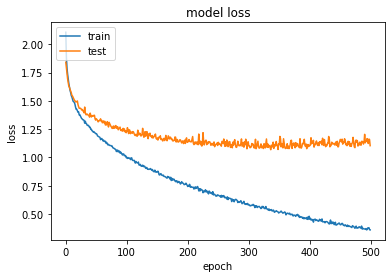

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Saving the model

In [ ]:
model_name = 'omar.h5'
save_dir = os.path.join(os.getcwd(), 'Trained_Models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/Trained_Models/omar.h5 


In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

### Loading the model

In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./Trained_Models/omar.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 59.77%


# 8. Test Set Prediction

### Predicting emotions on the test data

In [ ]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

16/16 [==============================] - 0s 19ms/step


In [ ]:
preds

array([[7.91616812e-02, 1.64135806e-02, 7.19692826e-01, ...,
        4.02650191e-03, 2.40646899e-02, 1.30809739e-01],
       [7.41819322e-01, 4.64208890e-04, 2.90136524e-02, ...,
        7.62141208e-05, 7.39666075e-03, 2.93380674e-03],
       [2.32902486e-02, 8.26120019e-01, 1.38488654e-02, ...,
        7.61217773e-02, 1.35774491e-02, 3.88735197e-02],
       ...,
       [2.50198692e-03, 3.19772482e-01, 5.34142971e-01, ...,
        6.42320216e-02, 3.70312631e-02, 1.10171717e-02],
       [5.06027341e-02, 2.23359372e-03, 4.36748385e-01, ...,
        1.86777048e-04, 2.25046962e-01, 5.94037469e-04],
       [4.16623652e-02, 8.93745273e-02, 1.05961554e-01, ...,
        5.01987943e-03, 7.28634885e-03, 7.09731162e-01]], dtype=float32)

In [ ]:
preds1=preds.argmax(axis=1)

In [ ]:
preds1

array([2, 0, 1, 3, 3, 6, 3, 5, 3, 5, 2, 2, 0, 4, 4, 5, 2, 5, 1, 5, 2, 1,
       6, 4, 0, 0, 0, 2, 2, 3, 3, 5, 5, 3, 1, 3, 5, 3, 2, 3, 5, 6, 4, 0,
       5, 1, 1, 1, 1, 5, 1, 3, 2, 5, 5, 5, 2, 4, 1, 4, 4, 0, 5, 1, 0, 3,
       5, 2, 0, 0, 3, 2, 6, 2, 4, 5, 5, 6, 0, 1, 5, 1, 0, 2, 6, 3, 6, 2,
       2, 2, 5, 0, 4, 2, 2, 6, 6, 5, 4, 2, 2, 4, 5, 5, 2, 5, 5, 5, 6, 6,
       2, 0, 0, 3, 4, 5, 2, 2, 2, 2, 5, 3, 6, 2, 0, 5, 2, 2, 5, 1, 2, 5,
       1, 3, 4, 5, 5, 0, 1, 4, 0, 0, 1, 2, 0, 0, 1, 5, 4, 5, 5, 1, 2, 0,
       5, 5, 1, 2, 6, 5, 2, 5, 5, 5, 0, 2, 4, 4, 1, 6, 6, 5, 1, 4, 6, 1,
       2, 5, 2, 5, 1, 0, 4, 2, 2, 5, 2, 2, 1, 0, 5, 0, 4, 1, 4, 1, 0, 6,
       2, 0, 0, 2, 5, 4, 6, 3, 4, 2, 0, 4, 3, 2, 2, 2, 4, 1, 4, 6, 2, 4,
       5, 5, 0, 2, 4, 4, 1, 5, 5, 1, 5, 1, 4, 4, 5, 2, 1, 5, 1, 6, 6, 5,
       5, 2, 4, 5, 5, 2, 1, 0, 1, 4, 0, 5, 5, 1, 1, 1, 5, 4, 3, 2, 1, 4,
       2, 6, 5, 6, 2, 2, 5, 4, 2, 5, 5, 3, 2, 5, 0, 0, 2, 2, 5, 0, 6, 5,
       3, 4, 5, 1, 5, 3, 4, 6, 5, 0, 2, 2, 1, 1, 5,

In [ ]:
abc = preds1.astype(int).flatten()

In [ ]:
predictions = (lb.inverse_transform((abc)))

In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,2
1,0
2,1
3,3
4,3
5,6
6,3
7,5
8,3
9,5


In [ ]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,2
1,0
2,1
3,2
4,3
5,6
6,6
7,5
8,3
9,5


In [ ]:
finaldf = actualdf.join(preddf)

In [ ]:
true_positive_cnn = 0
for i in range(0,len(finaldf)):
  if(finaldf.iloc[i][0]==finaldf.iloc[i][1]):
    true_positive_cnn+=1
cnn_accuracy = true_positive_cnn/len(finaldf)
cnn_accuracy*100

59.765625

## Actual v/s Predicted emotions

In [ ]:
finaldf[130:140]

,actualvalues,predictedvalues
130,1,2
131,5,5
132,1,1
133,3,3
134,4,4
135,0,5
136,3,5
137,0,0
138,1,1
139,6,4


In [ ]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
0,81
1,60
2,83
3,85
4,53
5,97
6,53


In [ ]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
0,67
1,63
2,111
3,43
4,51
5,130
6,47


In [ ]:
finaldf.to_csv('Predictions.csv', index=False)

# 9.  Demonstration

#### The file 'output10.wav' in the next cell is the file that was recorded live using the code in AudioRecoreder notebook found in the repository

In [ ]:
demo_audio_path = '/content/drive/MyDrive/ravdess data/Actor_01/03-01-01-01-01-01-01.wav'
ipd.Audio('/content/drive/MyDrive/ravdess data/Actor_01/03-01-01-01-01-01-01.wav')

NameError: ignored

In [ ]:
demo_mfcc, demo_pitch, demo_mag, demo_chrom = get_audio_features(demo_audio_path,sampling_rate)

mfcc = pd.Series(demo_mfcc)
pit = pd.Series(demo_pitch)
mag = pd.Series(demo_mag)
C = pd.Series(demo_chrom)
demo_audio_features = pd.concat([mfcc,pit,mag,C],ignore_index=True)

NameError: ignored

In [ ]:
demo_audio_features= np.expand_dims(demo_audio_features, axis=0)
demo_audio_features= np.expand_dims(demo_audio_features, axis=2)

In [ ]:
demo_audio_features.shape

(1, 65, 1)

In [ ]:
livepreds = loaded_model.predict(demo_audio_features, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 95ms/step


In [ ]:
livepreds

array([[0.07298071, 0.16389072, 0.277867  , 0.09964555, 0.0555183 ,
        0.07205304, 0.25804466]], dtype=float32)

In [ ]:
# emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]
index = livepreds.argmax(axis=1).item()
index

2

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame()

In [ ]:
df.head(3)

""


In [ ]:
emotions[index]

'fear'